In [1]:
import numpy as np
import pandas as pd

from concurrent.futures import ProcessPoolExecutor, as_completed, ThreadPoolExecutor
import joblib
from joblib import Parallel, delayed, parallel_backend
import multiprocessing
from multiprocessing import Value
from tqdm.auto import tqdm


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsRegressor
from joblib import Parallel, delayed
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import shap



In [2]:
def name_columns(df):
    column_names = ['ecg_cleaned_mean_p1', 'rr_signal_mean_p1', 'bvp_cleaned_mean_p1', 'gsr_cleaned_mean_p1', 'gsr_tonic_mean_p1', 'gsr_phasic_mean_p1', 'gsr_SMNA_mean_p1', 'rsp_cleaned_mean_p1', 'resp_rate_mean_p1', 'emg_zygo_cleaned_mean_p1', 'emg_coru_cleaned_mean_p1', 'emg_trap_cleaned_mean_p1', 'skt_filtered_mean_p1',
    'ecg_cleaned_min_p1', 'rr_signal_min_p1', 'bvp_cleaned_min_p1', 'gsr_cleaned_min_p1', 'gsr_tonic_min_p1', 'gsr_phasic_min_p1', 'gsr_SMNA_min_p1', 'rsp_cleaned_min_p1', 'resp_rate_min_p1', 'emg_zygo_cleaned_min_p1', 'emg_coru_cleaned_min_p1', 'emg_trap_cleaned_min_p1', 'skt_filtered_min_p1',

    'ecg_cleaned_mean_p2', 'rr_signal_mean_p2', 'bvp_cleaned_mean_p2', 'gsr_cleaned_mean_p2', 'gsr_tonic_mean_p2', 'gsr_phasic_mean_p2', 'gsr_SMNA_mean_p2', 'rsp_cleaned_mean_p2', 'resp_rate_mean_p2', 'emg_zygo_cleaned_mean_p2', 'emg_coru_cleaned_mean_p2', 'emg_trap_cleaned_mean_p2', 'skt_filtered_mean_p2',
    'ecg_cleaned_min_p2', 'rr_signal_min_p2', 'bvp_cleaned_min_p2', 'gsr_cleaned_min_p2', 'gsr_tonic_min_p2', 'gsr_phasic_min_p2', 'gsr_SMNA_min_p2', 'rsp_cleaned_min_p2', 'resp_rate_min_p2', 'emg_zygo_cleaned_min_p2', 'emg_coru_cleaned_min_p2', 'emg_trap_cleaned_min_p2', 'skt_filtered_min_p2',

    'ecg_cleaned_mean_p3', 'rr_signal_mean_p3', 'bvp_cleaned_mean_p3', 'gsr_cleaned_mean_p3', 'gsr_tonic_mean_p3', 'gsr_phasic_mean_p3', 'gsr_SMNA_mean_p3', 'rsp_cleaned_mean_p3', 'resp_rate_mean_p3', 'emg_zygo_cleaned_mean_p3', 'emg_coru_cleaned_mean_p3', 'emg_trap_cleaned_mean_p3', 'skt_filtered_mean_p3',
    'ecg_cleaned_min_p3', 'rr_signal_min_p3', 'bvp_cleaned_min_p3', 'gsr_cleaned_min_p3', 'gsr_tonic_min_p3', 'gsr_phasic_min_p3', 'gsr_SMNA_min_p3', 'rsp_cleaned_min_p3', 'resp_rate_min_p3', 'emg_zygo_cleaned_min_p3', 'emg_coru_cleaned_min_p3', 'emg_trap_cleaned_min_p3', 'skt_filtered_min_p3']

    # Split the column names into the desired levels
    split_columns = [col.split('_') for col in column_names]

    # Organize the levels and construct a MultiIndex
    levels = [
        [col[0] for col in split_columns],
        ['_'.join(col[1:-2]) for col in split_columns],
        [col[-2] for col in split_columns],
        [col[-1] for col in split_columns],

    ]

    multiindex = pd.MultiIndex.from_arrays(levels, names=['signal', 'preprocess', 'aggregation', 'partition'])
    
    df.columns = multiindex
    return df


# df_importances = pd.DataFrame(all_importances, )
# df_shap_values = pd.DataFrame(all_shap_values)

df_importances = pd.read_csv('feature_importances.csv', index_col=0)

df_importances = name_columns(df_importances)

# df_shap_values = name_columns(df_shap_values)

# df_importances.to_csv('feature_importances.csv')
# df_shap_values.to_csv('shap_values.csv')


display(df_importances)
# display(df_shap_values)



signal            ecg        rr       bvp       gsr                      \
preprocess    cleaned    signal   cleaned   cleaned     tonic    phasic   
aggregation      mean      mean      mean      mean      mean      mean   
partition          p1        p1        p1        p1        p1        p1   
0            0.000006  0.000140  0.000005  0.247871  0.203050  0.001091   
1            0.000014  0.000109  0.000009  0.002568  0.003347  0.002748   
2            0.000009  0.000305  0.000006  0.022441  0.000227  0.000618   
3            0.000019  0.007549  0.000141  0.002495  0.002572  0.003765   
4            0.000008  0.000138  0.000013  0.008138  0.048704  0.000551   
5            0.000300  0.001471  0.000812  0.037474  0.052860  0.001089   
6            0.000164  0.027895  0.000071  0.029302  0.054551  0.002657   
7            0.000013  0.001371  0.000059  0.181295  0.138368  0.006060   
8            0.000048  0.002167  0.000022  0.000472  0.000478  0.000404   
9            0.000015  0.000415  0.000040  0.000506  0.000825  0.110921   
10           0.000024  0.000781  0.000017  0.274687  0.228181  0.000233   
11           0.000017  0.001527  0.000005  0.028404  0.037993  0.000225   
12           0.000005  0.000125  0.000011  0.006795  0.023519  0.000131   
13           0.000018  0.000439  0.000016  0.000969  0.003009  0.008486   
14           0.000008  0.000946  0.000008  0.025372  0.009024  0.000132   
15           0.000010  0.008584  0.000009  0.099293  0.316076  0.000097   
16           0.000168  0.005118  0.000018  0.000776  0.001086  0.000736   
17           0.002816  0.015582  0.001513  0.003547  0.004982  0.007255   
18           0.000034  0.000223  0.000008  0.000918  0.000294  0.865437   
19           0.000041  0.000279  0.000042  0.000268  0.001602  0.026369   
20           0.000006  0.001035  0.000006  0.217388  0.187936  0.000074   
21           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
22           0.000007  0.003861  0.000008  0.237433  0.177519  0.002239   
23           0.000002  0.000118  0.000007  0.000648  0.000425  0.000252   
24           0.000003  0.000625  0.000004  0.240012  0.211007  0.001488   
25           0.000017  0.110204  0.000007  0.000680  0.002351  0.000284   
26           0.000175  0.158009  0.000060  0.011594  0.006724  0.002277   
27           0.000005  0.000022  0.000004  0.001146  0.000601  0.000009   
28           0.000171  0.103352  0.000334  0.067884  0.052730  0.003217   
29           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

signal                      rsp      resp           emg  ...       gsr  \
preprocess       SMNA   cleaned      rate  zygo_cleaned  ...   cleaned   
aggregation      mean      mean      mean          mean  ...       min   
partition          p1        p1        p1            p1  ...        p3   
0            0.000024  0.000020  0.000027  1.244759e-06  ...  0.022370   
1            0.006253  0.000068  0.000088  3.693630e-07  ...  0.000128   
2            0.000118  0.001141  0.002029  1.091557e-05  ...  0.000311   
3            0.000421  0.000442  0.000867  5.227571e-06  ...  0.001406   
4            0.000257  0.000139  0.000398  7.173005e-06  ...  0.000257   
5            0.000739  0.001343  0.002259  1.093184e-03  ...  0.002019   
6            0.001324  0.004601  0.002002  6.371104e-05  ...  0.039978   
7            0.000154  0.001036  0.000812  5.256365e-06  ...  0.020144   
8            0.000342  0.000231  0.000497  5.935856e-06  ...  0.000222   
9            0.000645  0.000404  0.001465  1.742097e-06  ...  0.019516   
10           0.000238  0.000113  0.008823  4.329160e-06  ...  0.000162   
11           0.000260  0.000124  0.002942  1.997658e-06  ...  0.000218   
12           0.000067  0.000074  0.000247  1.045003e-06  ...  0.014072   
13           0.000364  0.000503  0.025026  7.486862e-03  ...  0.116966   
14           0.000126  0.000089  0.000124  1.337467e-07  ...  0.012162   
15           0.002359  0.002290  0.000152  

Passing `palette` without assigning `hue` is deprecated.
Passing `palette` without assigning `hue` is deprecated.
Passing `palette` without assigning `hue` is deprecated.


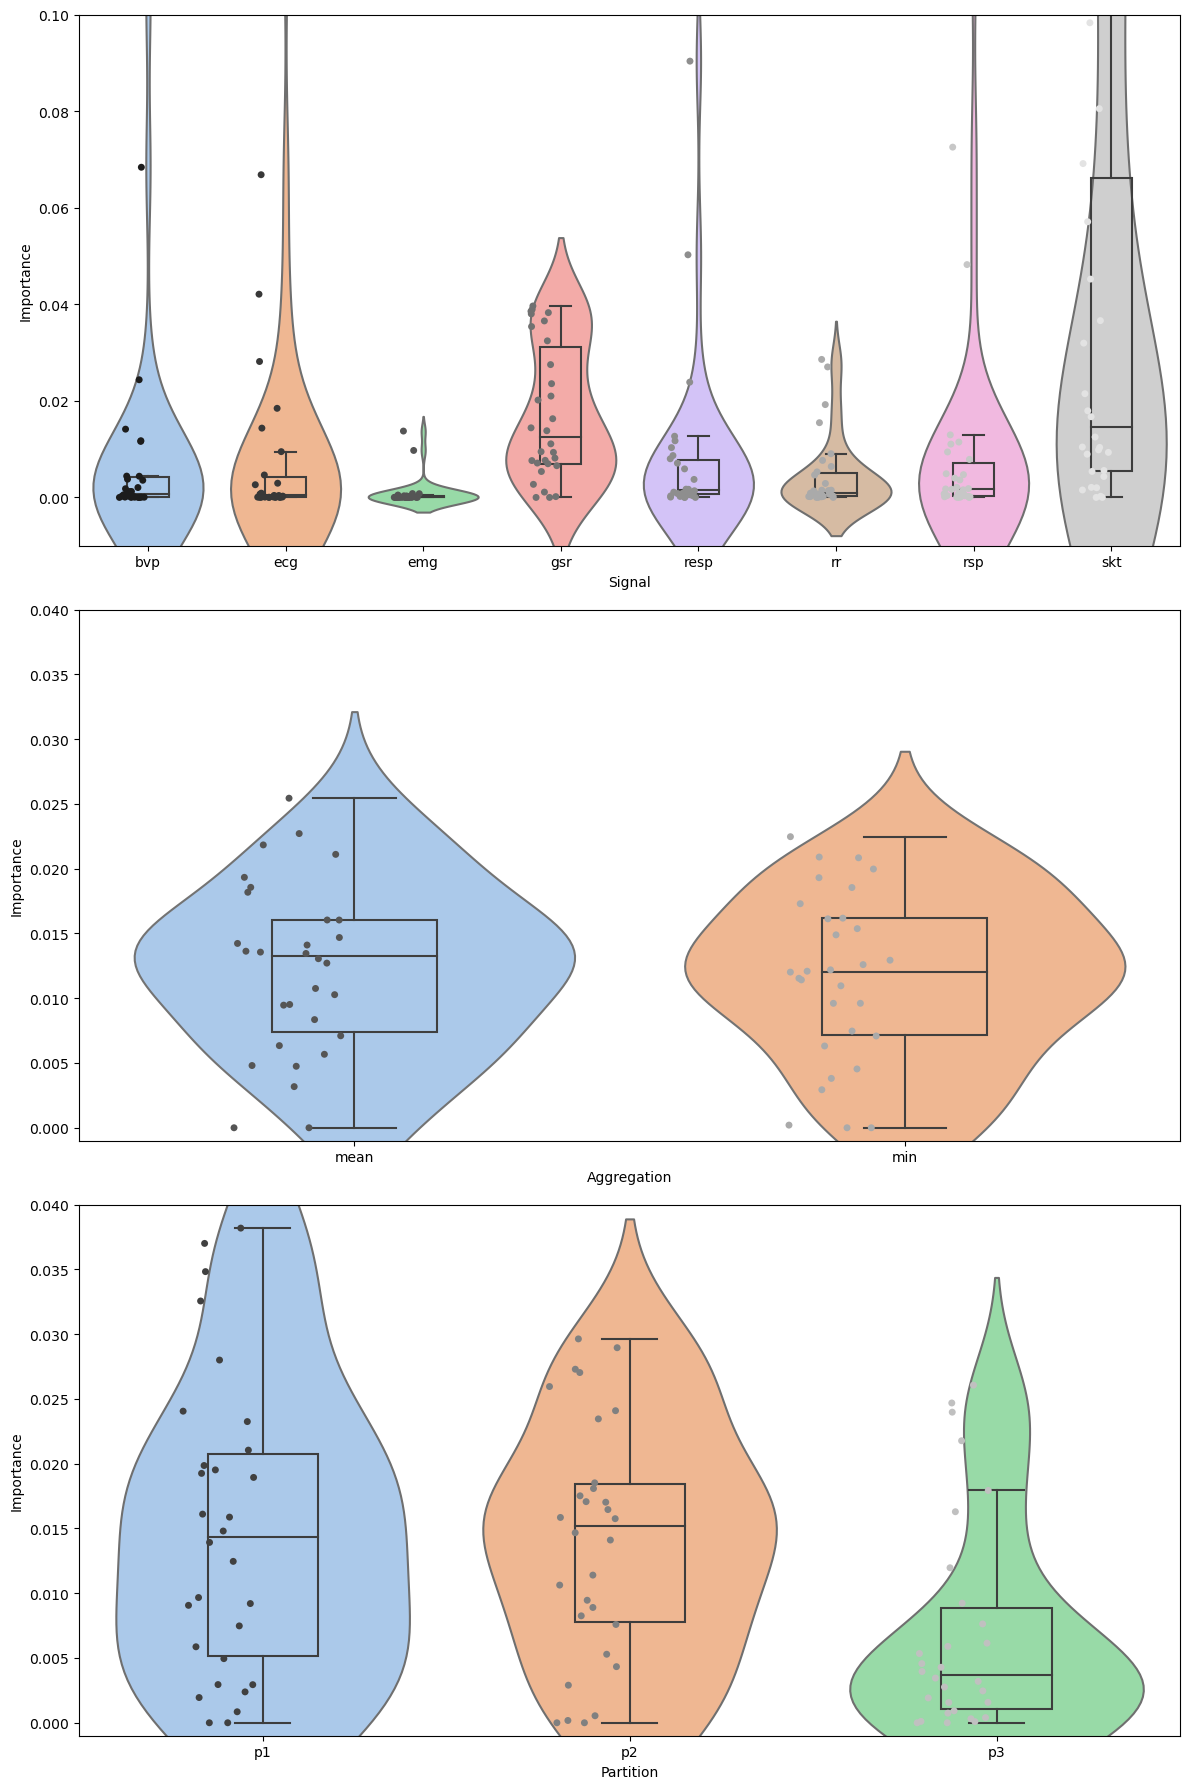

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Group and aggregate the importances by the desired levels
grouped_by_signal = df_importances.groupby(level='signal', axis=1).mean()
grouped_by_aggregation = df_importances.groupby(level='aggregation', axis=1).mean()
grouped_by_partition = df_importances.groupby(level='partition', axis=1).mean()

# Melt the DataFrames for seaborn
grouped_by_signal_melt = grouped_by_signal.melt(var_name="Signal", value_name="Importance")
grouped_by_aggregation_melt = grouped_by_aggregation.melt(var_name="Aggregation", value_name="Importance")
grouped_by_partition_melt = grouped_by_partition.melt(var_name="Partition", value_name="Importance")


fig, axes = plt.subplots(3, 1, figsize=(12, 18))
palette = sns.color_palette("pastel")

box_alpha = 0.7

def plot_half_violin_box_strip(data, x, y, ax):
    sns.violinplot(y=y, x=x, data=data, palette=palette, scale="width", inner=None, ax=ax)
    ylim = ax.get_ylim()

    sns.boxplot(y=y, x=x, data=data, saturation=1, showfliers=False, width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
    old_len_collections = len(ax.collections)
    sns.stripplot(y=y, x=x, data=data, palette = 'gray', ax=ax)
    for dots in ax.collections[old_len_collections:]:
        dots.set_offsets(dots.get_offsets() + np.array([-0.12, 0]))
    ax.set_ylim(ylim)
    
plot_half_violin_box_strip(grouped_by_signal_melt, "Signal", "Importance", axes[0])
# axes[0].set_title("Aggregated Importances by Signal")

plot_half_violin_box_strip(grouped_by_aggregation_melt, "Aggregation", "Importance", axes[1])
# axes[1].set_title("Aggregated Importances by Aggregation")

plot_half_violin_box_strip(grouped_by_partition_melt, "Partition", "Importance", axes[2])
# axes[2].set_title("Aggregated Importances by Partition")


# Set y-axis limits to crop extreme points
y_min, y_max = -0.01, 0.2  # Adjust these values based on the desired range
axes[0].set_ylim(-0.01, 0.1 )
axes[1].set_ylim(-0.001, 0.04 )
axes[2].set_ylim(-0.001, 0.04 )

plt.tight_layout()
plt.show()


In [4]:
add_asterisks_anova(axes[0], grouped_by_signal_melt, signal_labels, "Signal", "Importance", 0.095)

NameError: name 'add_asterisks_anova' is not defined

ANOVA Table:    Source        SS   DF        MS        F         p-unc       np2
0  Signal  0.038903    7  0.005558  9.54536  2.048545e-10  0.223606
1  Within  0.135076  232  0.000582      NaN           NaN       NaN
ANOVA Table:       Source        SS  DF        MS         F     p-unc       np2
0  Partition  0.001227   2  0.000614  5.279791  0.006852  0.108237
1     Within  0.010113  87  0.000116       NaN       NaN       NaN


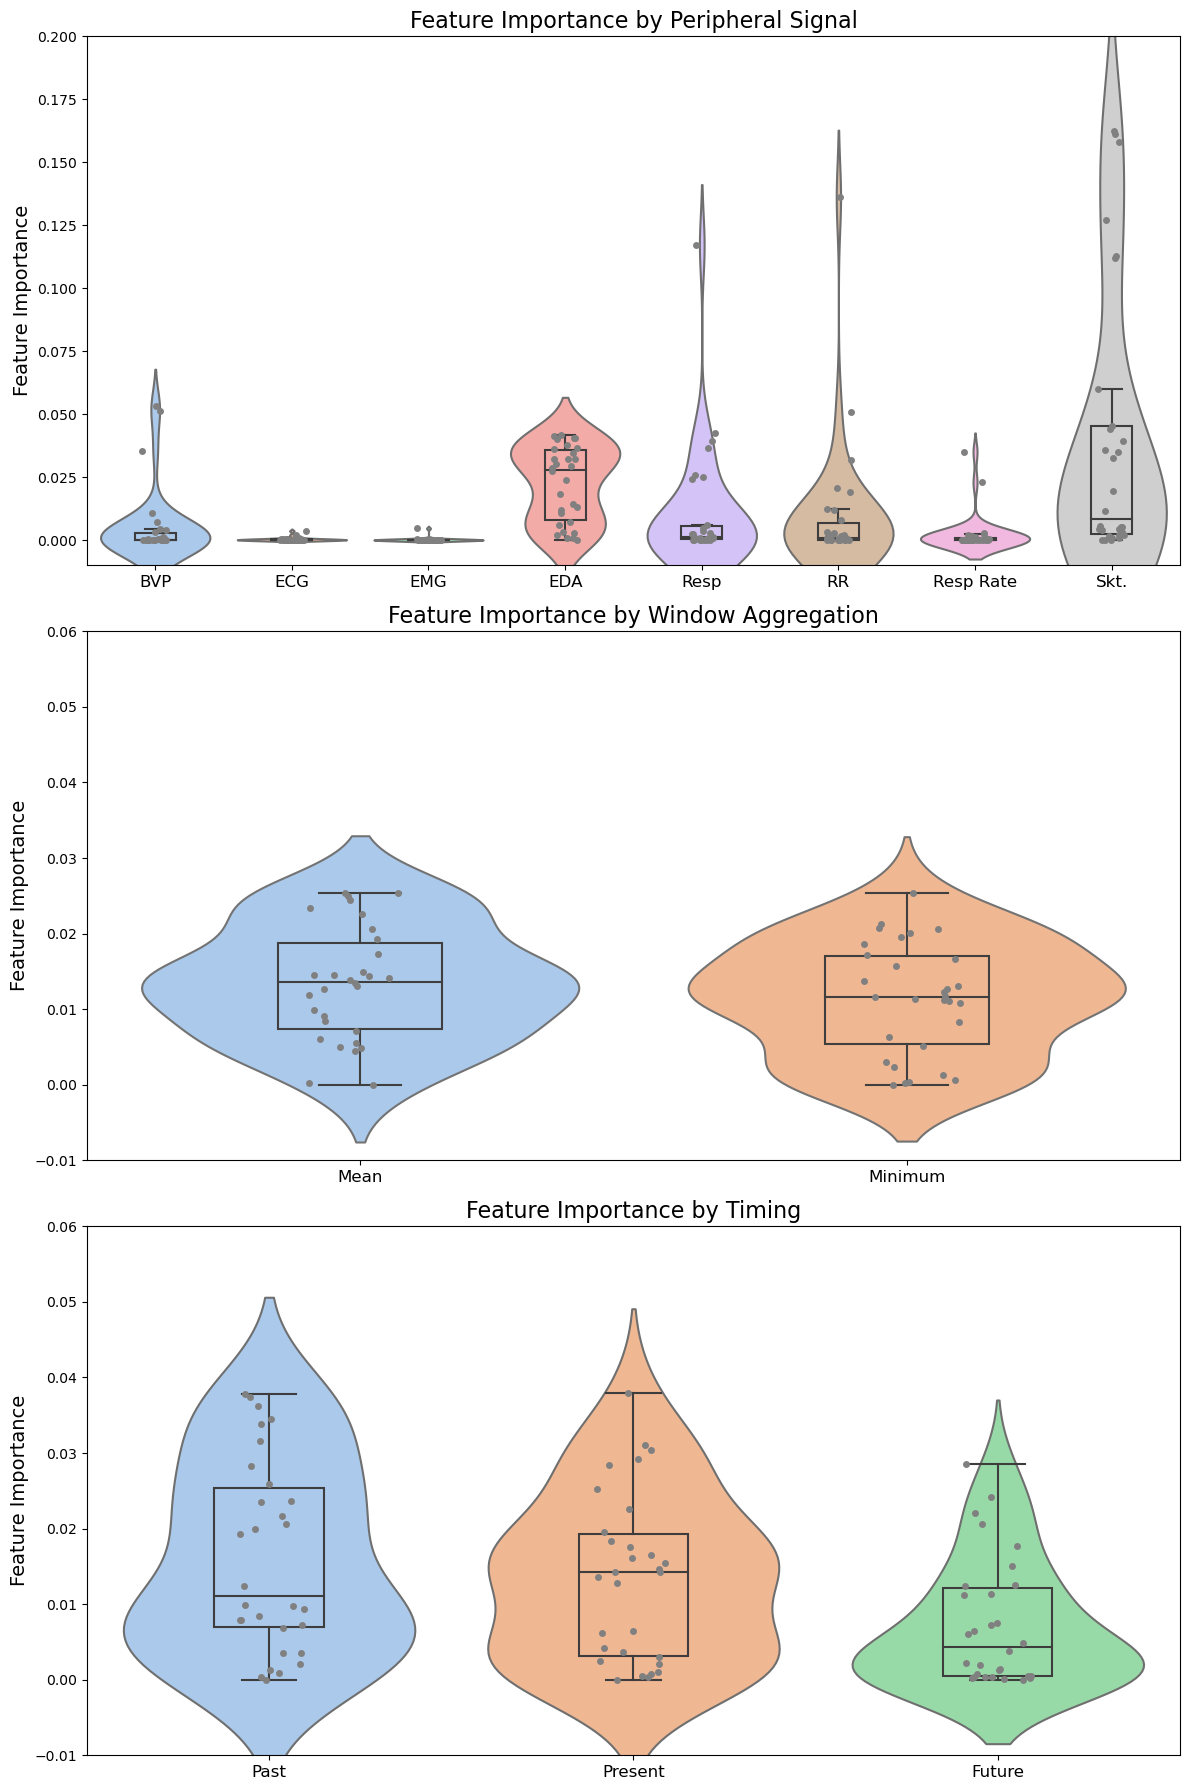

In [8]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.weightstats import ttest_ind

# Group and aggregate the importances by the desired levels
grouped_by_signal = df_importances.groupby(level='signal', axis=1).mean()
grouped_by_aggregation = df_importances.groupby(level='aggregation', axis=1).mean()
grouped_by_partition = df_importances.groupby(level='partition', axis=1).mean()

# Melt the DataFrames for seaborn
grouped_by_signal_melt = grouped_by_signal.melt(var_name="Signal", value_name="Importance")
grouped_by_aggregation_melt = grouped_by_aggregation.melt(var_name="Aggregation", value_name="Importance")
grouped_by_partition_melt = grouped_by_partition.melt(var_name="Partition", value_name="Importance")

import pingouin as pg

def add_asterisks_anova(ax, data, labels, x_col, y_col, y_offset, alpha=0.05):
    data = data.dropna(subset=[y_col])
    # print(f"Data: {data.head()}")
    anova_table = pg.anova(data=data, dv=y_col, between=x_col, detailed=True)
    print(f"ANOVA Table: {anova_table}")
    # p_value = anova_table.loc['Signal', "p-unc"]
    
    # if p_value < alpha:
    #     ax.text(len(labels) / 2, y_offset, "*", ha='center', va='bottom')

    # return p_value  # Add this line to return the p-value


def add_asterisks_ttest(ax, data, labels, x_col, y_col, y_offset, alpha=0.05):
    data = data.dropna(subset=[y_col])
    p_values = []

    for i in range(len(labels) - 1):
        group1 = data[data[x_col] == labels[i]][y_col].dropna()
        group2 = data[data[x_col] == labels[i + 1]][y_col].dropna()
        ttest_result = pg.ttest(group1, group2)
        p_value = ttest_result.at['T-test', 'p-val']
    #     p_values.append(p_value)

    #     if p_value < alpha:
    #         ax.text(i + 0.5, y_offset, "*", ha='center', va='bottom')

    # return p_values




fig, axes = plt.subplots(3, 1, figsize=(12, 18))
palette = sns.color_palette("pastel")

box_alpha = 0.7

# Set labels
signal_labels = ["BVP", "ECG", "EMG", "EDA", "Resp", "RR", "Resp Rate", "Skt."]
aggregation_labels = ["Mean", "Minimum"]
partition_labels = ["Past", "Present", "Future"]

def plot_half_violin_box_strip(data, x, y, ax):
    sns.violinplot(y=y, x=x, data=data, palette=palette, scale="width", inner=None, ax=ax)
    ylim = ax.get_ylim()

    sns.boxplot(y=y, x=x, data=data, saturation=1, showfliers=False, width=0.3, boxprops={'zorder': 3, 'facecolor': 'none'}, ax=ax)
    old_len_collections = len(ax.collections)
    sns.stripplot(y=y, x=x, data=data, color = 'gray', ax=ax)
    # for dots in ax.collections[old_len_collections:]:
    #     dots.set_offsets(dots.get_offsets() + np.array([-0.12, 0]))
    ax.set_ylim(ylim)

plot_half_violin_box_strip(grouped_by_signal_melt, "Signal", "Importance", axes[0])
axes[0].set_title("Feature Importance by Peripheral Signal", fontsize=16)
axes[0].set_xticklabels(signal_labels, fontsize=12)
axes[0].set_xlabel("")
axes[0].set_ylabel("Feature Importance", fontsize=14)
add_asterisks_anova(axes[0], grouped_by_signal_melt, signal_labels, "Signal", "Importance", 0.095)



plot_half_violin_box_strip(grouped_by_aggregation_melt, "Aggregation", "Importance", axes[1])
axes[1].set_title("Feature Importance by Window Aggregation", fontsize=16)
axes[1].set_xticklabels(aggregation_labels, fontsize=12)
axes[1].set_xlabel("")
axes[1].set_ylabel("Feature Importance", fontsize=14)
# add_asterisks_ttest(axes[1], grouped_by_aggregation_melt, aggregation_labels, "Aggregation", "Importance", 0.038)


plot_half_violin_box_strip(grouped_by_partition_melt, "Partition", "Importance", axes[2])
axes[2].set_title("Feature Importance by Timing", fontsize=16)
axes[2].set_xticklabels(partition_labels, fontsize=12)
axes[2].set_xlabel("")
axes[2].set_ylabel("Feature Importance", fontsize=14)
add_asterisks_anova(axes[2], grouped_by_partition_melt, partition_labels, "Partition", "Importance", 0.05)

# Set y-axis limits to crop extreme points
y_min, y_max = -0.01, 0.2  # Adjust these values based on the desired range
axes[0].set_ylim(-0.01, 0.2)
axes[1].set_ylim(-0.01, 0.06)
axes[2].set_ylim(-0.01, 0.06)

plt.tight_layout()
plt.show()

